In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ranking_data = pd.read_excel("样本数据-最基础版.xlsx", sheet_name='综合排序', date_parser=True,index_col = '证券代码')
ranking_data.head(1)

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
证券代码,,,,,,,,,,,,,,,,,,,,,
288001.OF,7.086695,9.320847,8.960179,7.463256,7.754675,8.086766,8.11621,7.977562,8.281928,8.229776,...,2.706151,2.866273,2.805789,2.982578,2.442352,3.108886,3.976954,4.093331,4.987158,4.359409


In [3]:
cost_data = pd.read_excel("样本数据-最基础版.xlsx", sheet_name='费率', date_parser=True,index_col = '证券代码')
cost_data = cost_data/100
cost_data.head(1)

,申购费率(前端，%),"赎回费率(后端,%)"
证券代码,,
288001.OF,0.0001,0.005


In [4]:
return_rate_data = pd.read_excel("样本数据-最基础版.xlsx", sheet_name='单位复权净值增长率（月度）', date_parser=True,index_col = '证券代码')
return_rate_data = return_rate_data/100
return_rate_data.head(1)

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
证券代码,,,,,,,,,,,,,,,,,,,,,
288001.OF,0.012914,0.063461,-0.004284,-0.086919,-0.031599,0.018234,0.032988,-0.001832,0.048624,0.043286,...,-0.059558,-0.024072,-0.052472,-0.003195,-0.08547,0.017943,-0.003525,0.015187,0.101266,0.054336


In [5]:
alpha_data = pd.read_excel("样本数据-最基础版.xlsx", sheet_name='Alpha', date_parser=True,index_col = '证券代码')
alpha_data.head(1)

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
证券代码,,,,,,,,,,,,,,,,,,,,,
288001.OF,0.001904,0.00467,-0.000708,-0.003969,-0.001269,0.000621,0.000975,-0.002089,0.000922,-0.000367,...,0.002209,-0.000138,-0.000409,-0.001896,-0.002437,0.001078,0.001721,-0.000764,0.000533,0.000549


In [6]:
def loc_fund_return(bond, time):
    return return_rate_data.loc[bond, time]

def loc_fund_cost(bond):
    buy_cost = cost_data.loc[bond, '申购费率(前端，%)']
    sell_cost = cost_data.loc[bond, '赎回费率(后端,%)']
    return buy_cost, sell_cost

def cal_lrc(bond, time):
    trc = loc_fund_return(bond, time)
    buy_cost, sell_cost = loc_fund_cost(bond)
    return (1 + trc)*(1 - buy_cost)*(1 - sell_cost) -1    

def cal_fund_return(fund_list, time, weight):
    '''
    '''
    return_list = []
    for bond in fund_list:
        return_list.append(cal_lrc(bond, time))
    return np.array(return_list)@np.array(weight).T

def loc_alpha(bond, time):
    return alpha_data.loc[bond, time]


def cal_fund_alpha(fund_list, time, weight):
    '''
    '''
    alpha_list = []
    for bond in fund_list:
        alpha_list.append(loc_alpha(bond, time))
    return np.array(alpha_list)@np.array(weight).T

In [7]:
top_n = 5
def select(data, top_n):
    '''
    month的格式 '2019/4'
    '''
    selected_funds = {}
    for i in data:
        top_select = data[i].sort_values(ascending = False)[:top_n]        
        selected_funds[i] = top_select.index.tolist()
    return selected_funds
selected_funds_dic = select(ranking_data, top_n)
selected_funds_df = pd.DataFrame(selected_funds_dic)

In [8]:
weight = np.ones(top_n)/top_n

predict_return_df = pd.DataFrame(columns=ranking_data.columns, index = ['return'] )
alpha_df = pd.DataFrame(columns=ranking_data.columns, index = ['return'] )
for mon in selected_funds_dic:
    predict_return_df.loc['return', mon] = cal_fund_return(selected_funds_dic[mon], mon, weight)
    alpha_df.loc['return', mon] = cal_fund_alpha(selected_funds_dic[mon], mon, weight)
    
predict_return_df

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
return,-0.000337578,0.0992351,0.0216397,-0.0391952,-0.0139297,0.0197127,0.057353,0.0252356,0.0755383,0.0812782,...,-0.0472327,-0.0244705,-0.0240433,0.0425063,-0.035896,0.0184478,-0.0298054,0.0586645,0.119799,0.0928642


In [9]:
selected_funds_df

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
0,450004.OF,240008.OF,519670.OF,070013.OF,260101.OF,240001.OF,470009.OF,070013.OF,519670.OF,233007.OF,...,202011.OF,450002.OF,519688.OF,110011.OF,040011.OF,110011.OF,260112.OF,519069.OF,160505.OF,180012.OF
1,202011.OF,519670.OF,151001.OF,470009.OF,070013.OF,519670.OF,070013.OF,163406.OF,470009.OF,519110.OF,...,519688.OF,257020.OF,450002.OF,162605.OF,519688.OF,162605.OF,270002.OF,040011.OF,110011.OF,110011.OF
2,070013.OF,240001.OF,470009.OF,233007.OF,377530.OF,470009.OF,163406.OF,233007.OF,340007.OF,470009.OF,...,519181.OF,519069.OF,202011.OF,481008.OF,540002.OF,450002.OF,160505.OF,160505.OF,180012.OF,270002.OF
3,519670.OF,660001.OF,260109.OF,070001.OF,070001.OF,070001.OF,519670.OF,070001.OF,260101.OF,070001.OF,...,180012.OF,519688.OF,270002.OF,180012.OF,450002.OF,270002.OF,110011.OF,180012.OF,040011.OF,040011.OF
4,519069.OF,470009.OF,260104.OF,240001.OF,233007.OF,660005.OF,070001.OF,377530.OF,240001.OF,519670.OF,...,257020.OF,260112.OF,519069.OF,450002.OF,040008.OF,519688.OF,040011.OF,270002.OF,166005.OF,166005.OF


In [10]:
predict_return_df

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
return,-0.000337578,0.0992351,0.0216397,-0.0391952,-0.0139297,0.0197127,0.057353,0.0252356,0.0755383,0.0812782,...,-0.0472327,-0.0244705,-0.0240433,0.0425063,-0.035896,0.0184478,-0.0298054,0.0586645,0.119799,0.0928642


In [11]:
weight = np.ones(top_n)/top_n
iteration = 100
random_return = pd.DataFrame(columns=ranking_data.columns, index = range(iteration))
random_alpha = pd.DataFrame(columns=ranking_data.columns, index = range(iteration))
for i in range(iteration):
    ran_select_fund = ranking_data.sample(top_n, axis=0).index.tolist()
    for mon in selected_funds_dic:
        random_return.loc[i, mon] = cal_fund_return(ran_select_fund, mon, weight)
        random_alpha.loc[i, mon] = cal_fund_alpha(ran_select_fund, mon, weight)
        

random_return.head(1)

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
0,-0.0261808,-0.0105299,-0.00913426,-0.0518618,-0.0209322,0.00805429,0.0409458,0.0255141,0.0430934,0.0509273,...,-0.0679706,-0.0361263,-0.0453409,-0.00682448,-0.0468352,0.00430266,-0.0520719,0.0525062,0.109773,0.0830271


In [17]:
random_alpha.head(3)

,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
0,0.00119204,0.00189482,-0.000903984,-0.00210618,-0.000343341,0.000332984,0.00161992,-0.0012318,0.000600838,7.84798e-05,...,0.00203951,-0.000309289,-8.11315e-06,-0.00191113,0.000246557,0.000776511,-0.000183548,0.000512826,-0.00104372,0.00140117
1,0.0015301,0.00355347,-0.00347179,-0.00216342,-0.000333258,0.000283555,0.0010445,-0.00244931,0.00182631,-0.000186158,...,0.00202238,-0.000784891,-0.000899867,-0.00260017,0.000402114,0.00149493,0.00020186,-0.000503886,0.000966189,0.00196669
2,0.00100791,0.00117871,-0.00137964,-0.00107415,-0.00141047,-0.000176639,0.00104004,-0.000169573,0.000121229,-0.000447609,...,0.00291552,-0.000742046,-0.000191118,-0.00130125,-0.00103869,0.000310261,0.000104984,0.000877846,-0.000222893,0.00309623


In [18]:
def aggregate(data):
    array = data.agg(np.average,axis= 0).values
    return pd.DataFrame(array, index = ranking_data.columns, columns=['return']).T
    
def visual(time, y_list, y_label):
    for y, label in zip(y_list, y_label):
        plt.plot(time, y, label = label)
    plt.legend()
    plt.show()
    
def plot(df1, df2):
    predict_return_arr = df1.loc['return',:].values
    random_return_arr = df2.loc['return',:].values

    time = ranking_data.columns
    y_list = (predict_return_arr, random_return_arr)
    y_label = ['selected', 'random']
    visual(time, y_list, y_label)

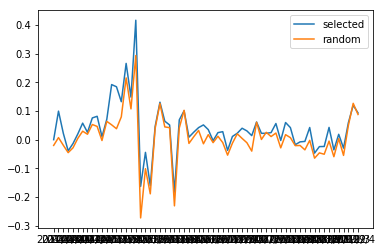

In [19]:
random_return_df = aggregate(random_return)
plot(predict_return_df, random_return_df)

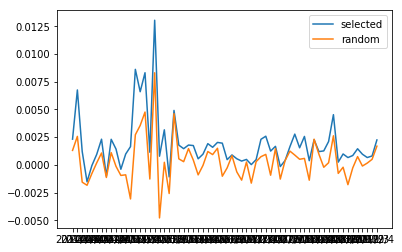

In [20]:
random_alpha_df = aggregate(random_alpha)
plot(alpha_df, random_alpha_df)

In [22]:
output_return

,type,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
return,selected,-0.000337578,0.0992351,0.0216397,-0.0391952,-0.0139297,0.0197127,0.057353,0.0252356,0.0755383,...,-0.0472327,-0.0244705,-0.0240433,0.0425063,-0.035896,0.0184478,-0.0298054,0.0586645,0.119799,0.0928642
return,random,-0.0203047,0.00691584,-0.0198932,-0.0455395,-0.0287398,0.00437252,0.0292743,0.0186617,0.0525787,...,-0.0648547,-0.0463258,-0.0511302,-0.00518447,-0.0597005,0.00329881,-0.0552107,0.0493096,0.126522,0.0875334


In [29]:
output_return = predict_return_df.append(random_return_df)
output_return.insert(0,'type', ('selected', 'random'))
output_return.to_excel('return.xlsx')

alpha_return = alpha_df.append(random_alpha_df)
alpha_return.insert(0,'type', ('selected', 'random'))
alpha_return.to_excel('alpha.xlsx')

In [19]:
rf_rate_data = pd.read_excel("样本数据-最基础版.xlsx", index_col = '指标名称',sheet_name='RF')
rf_rate_data.columns = ['rf']
rf_rate_data['rf'] = rf_rate_data['rf']/1200
rf_rate_data = rf_rate_data.T
rf_rate_data

指标名称,2014/1,2014/2,2014/3,2014/4,2014/5,2014/6,2014/7,2014/8,2014/9,2014/10,...,2018/7,2018/8,2018/9,2018/10,2018/11,2018/12,2019/1,2019/2,2019/3,2019/4
rf,0.003802,0.003739,0.003755,0.003655,0.003486,0.003377,0.003506,0.003539,0.003463,0.003201,...,0.002924,0.002973,0.003033,0.002972,0.002858,0.002747,0.0026,0.002599,0.002612,0.002708


In [20]:
# 计算sharpe ration

def cal_SR(return_rates, risk_free):
    std = np.std(return_rates, ddof = 1)
    mean = np.mean(return_rates)
    return (mean - risk_free)/std

def select_year(data, year):
    year = str(year)
    col = [mon for mon in data.columns if year in mon]
    return data.loc[:, col]

SR_df = pd.DataFrame(columns= range(2014, 2019), index = ['selected', 'random'])

for i, data in zip(['selected', 'random'], (predict_return_df, random_return_df)):
    for yr in range(2014, 2019):
        return_rates = select_year(data, yr).loc['return',:].values
        risk_free_rate = np.average(select_year(rf_rate_data, yr))
        SR_df.loc[i, yr] = cal_SR(return_rates, risk_free_rate)
        
SR_df.to_excel('sharpe ration.xlsx')
SR_df

,2014,2015,2016,2017,2018
selected,0.71637,0.583687,0.260989,0.722044,0.0100459
random,0.137178,0.21111,-0.05636,-0.0579477,-0.874531
